<div class="alert alert-block alert-info">
<h1><b>Pokemon Data Analysis</b></h1>
 </div>

<div class="alert alert-block alert-warning"> 

<b>Introduction</b>
    
- Pokémon originally started off as a trading card game and then grew into a television show and a video game with the help of Niantic and Nintendo. This project utilizes the Pokémon dataset that encompasses 1118 entries that span Pokémon across different ‘generations.’ Namely, it contains traditional Pokémon and new Pokémon. 
    
- The raw dataset also contains 49 columns that range from name & pokédex number to ghost attack effectiveness. The dataset brings in information for all users. In other words, it provides general information and blends it with explicit naming conventions. However, it also provides information regarding capture rates and egg cycles for those more invested in Pokémon. 
    
</div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy
import seaborn as sns
import os 
import math
from pandas.plotting import scatter_matrix
from itertools import combinations
from RegscorePy import mallow
from scipy import stats

 Source of Data- https://www.kaggle.com/kylekohnen/complete-pokemon-data-set

In [6]:
cwd = os.getcwd()
filename = cwd + "/LRA/pokemon.csv"

In [7]:
df_pokemon = pd.read_csv(filename, delimiter = ",")

## Data

<div class="alert alert-block alert-success">
    
<b> Basic Summary  </b>

</div>

In [8]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing                         1118 non-null   object 
 4   hp                             1118 non-null   int64  
 5   attack                         1118 non-null   int64  
 6   defense                        1118 non-null   int64  
 7   special_attack                 1118 non-null   int64  
 8   special_defense                1118 non-null   int64  
 9   speed                          1118 non-null   int64  
 10  height                         1118 non-null   int64  
 11  weight                         1118 non-null   int64  
 12  genus                          1118 non-null   o

<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- We have 48 columns explaining pokemon features . From summary can see evolves_from has 1118-550 nulls , need to treat or drop this feature from final model if used. Next step is to find out our response variable and features to be used to explain it.
</div>

In [7]:
df_pokemon.head(5).T

,0,1,2,3,4
name,Bulbasaur,Ivysaur,Venusaur,Venusaur Gmax,Venusaur Mega
pokedex_number,1,2,3,3,3
abilities,Overgrow~Chlorophyll,Overgrow~Chlorophyll,Overgrow~Chlorophyll,Overgrow~Chlorophyll,Thick Fat
typing,Grass~Poison,Grass~Poison,Grass~Poison,Grass~Poison,Grass~Poison
hp,45,60,80,80,80
attack,49,62,82,82,100
defense,49,63,83,83,123
special_attack,65,80,100,100,122
special_defense,65,80,100,100,120
speed,45,60,80,80,80


In [8]:
df_pokemon.select_dtypes(exclude=["number"]).columns ##Categorical with Bool variables

Index(['name', 'abilities', 'typing', 'genus', 'genderless', 'baby_pokemon',
       'legendary', 'mythical', 'is_default', 'forms_switchable', 'egg_groups',
       'can_evolve', 'evolves_from', 'primary_color', 'shape'],
      dtype='object')

<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- As we have ~45 pokemon characteristics, based on understanding, we will narrow down few numerical and categorical relevant variables which directly relates with speed.

</div>

In [9]:
df_pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
pokedex_number,1118.0,446.923077,270.915589,1.00,207.250,446.5,694.75,898.0
hp,1118.0,70.025939,26.646333,1.00,50.000,68.0,80.75,255.0
attack,1118.0,80.678891,32.056040,5.00,55.000,78.5,100.00,190.0
defense,1118.0,74.756708,30.954899,5.00,50.250,70.0,90.00,250.0
special_attack,1118.0,73.231664,32.454237,10.00,50.000,65.0,95.00,194.0
special_defense,1118.0,72.572451,27.782111,20.00,50.000,70.0,90.00,250.0
speed,1118.0,69.479428,30.036549,5.00,45.000,67.0,90.00,200.0
height,1118.0,21.427549,58.158211,1.00,5.000,10.0,16.00,1000.0
weight,1118.0,993.305009,2067.911505,1.00,88.000,302.5,800.00,10000.0
gen_introduced,1118.0,4.129696,2.337694,1.00,2.000,4.0,6.00,8.0


<AxesSubplot:ylabel='height'>

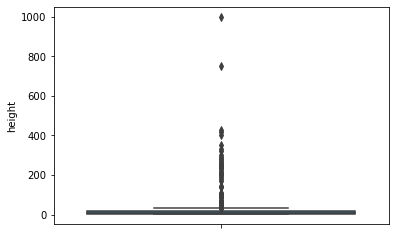

In [10]:
sns.boxplot(y='height',data=df_pokemon)

<AxesSubplot:ylabel='weight'>

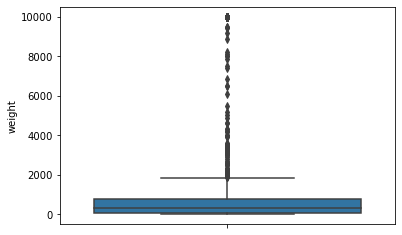

In [11]:
sns.boxplot(y='weight',data=df_pokemon)

In [12]:
cols = ["weight", "height"] # one or more

Q1 = df_pokemon[cols].quantile(0.25)
Q3 = df_pokemon[cols].quantile(0.75)
IQR = Q3 - Q1

df_pokemon = df_pokemon[~((df_pokemon[cols] < (Q1 - 1.5 * IQR)) |(df_pokemon[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
len(df_pokemon)

972

<AxesSubplot:ylabel='weight'>

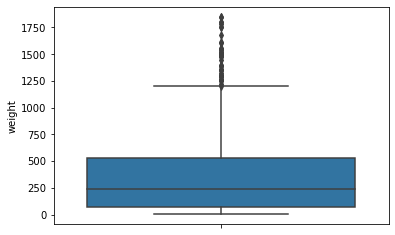

In [13]:
sns.boxplot(y='weight',data=df_pokemon)

In [14]:
df_pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
pokedex_number,972.0,431.545267,265.638886,1.00,194.750,428.0,668.25,898.0
hp,972.0,66.127572,23.124705,1.00,50.000,65.0,78.00,255.0
attack,972.0,76.310700,29.958917,5.00,55.000,73.0,95.00,190.0
defense,972.0,70.143004,27.098917,5.00,50.000,66.0,86.00,230.0
special_attack,972.0,70.475309,31.272603,10.00,46.750,65.0,92.00,194.0
special_defense,972.0,69.724280,26.385444,20.00,50.000,65.0,85.00,230.0
speed,972.0,68.961934,30.208162,5.00,45.000,65.0,90.00,200.0
height,972.0,9.733539,5.665040,1.00,5.000,9.0,14.00,30.0
weight,972.0,363.594650,379.278689,1.00,75.000,235.5,525.25,1850.0
gen_introduced,972.0,4.015432,2.283413,1.00,2.000,4.0,6.00,8.0


## Exploratory Data Analysis

In [15]:
median_speed = df_pokemon['speed'].median()
print(f"Average pokemon speed: {median_speed:.0f}")

Average pokemon speed: 65


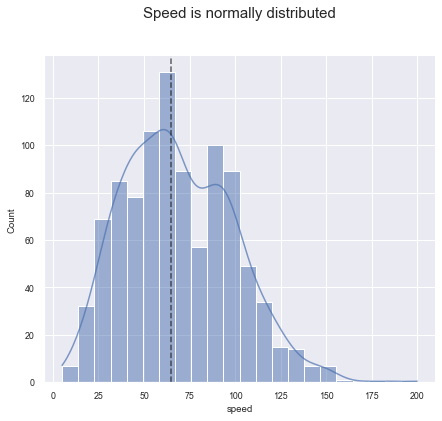

In [66]:
f, ax = plt.subplots(figsize=(7, 6))
sns.histplot(data=df_pokemon, x="speed", kde=True, ax = ax, line_kws = {'alpha':0.7})
ax.axvline(median_speed, c = "black", linestyle = "--", alpha = 0.6)
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False) ## almost our Y is normal distribution
ax.set_title("Speed is normally distributed", fontsize = 15, y = 1.1)
# plt.savefig("speed_hist")

<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- Speed of pokemon is almost normally distributed in sample with mean speed approximately=67
</div>

<div class="alert alert-block alert-success">    
<b><h4> Categorical Variables  </h4></b>
</div>

In [17]:
df_pokemon.select_dtypes(exclude=["number"]).columns ##Categorical with Bool variables

Index(['name', 'abilities', 'typing', 'genus', 'genderless', 'baby_pokemon',
       'legendary', 'mythical', 'is_default', 'forms_switchable', 'egg_groups',
       'can_evolve', 'evolves_from', 'primary_color', 'shape'],
      dtype='object')

<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- We have ~15 categorical variables in sample data of which we can plot relation with speed for few to check if there is significant difference in speed across categroies.

</div>

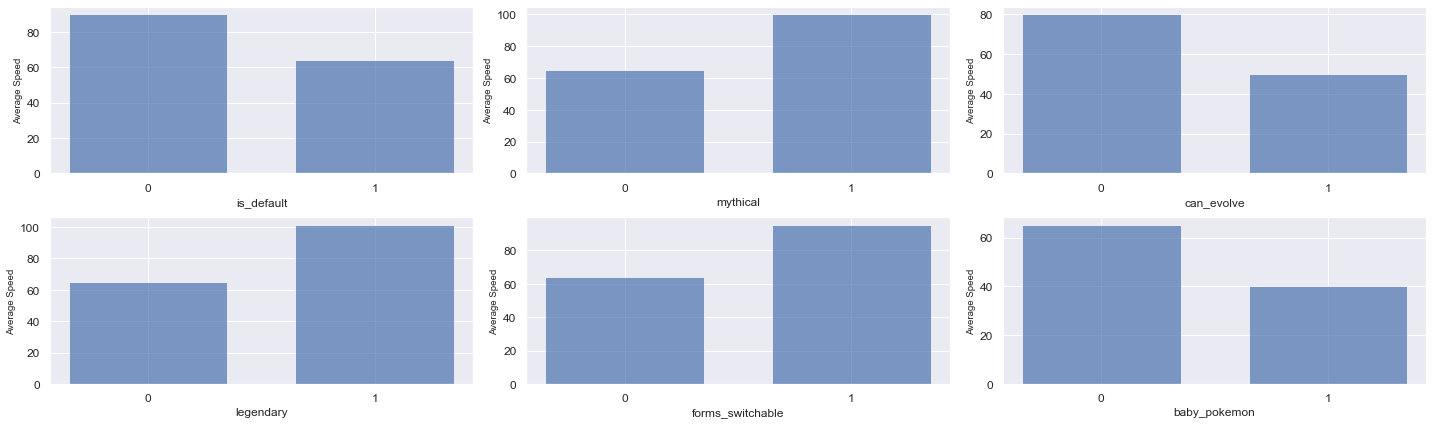

<Figure size 432x288 with 0 Axes>

In [86]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,6))
list_categories=['is_default','mythical','can_evolve','legendary','forms_switchable','baby_pokemon']
i,j=0,0
for cat in list_categories:
    df_new=df_pokemon.groupby(cat)['speed']. median().reset_index()
    x = df_new[cat]
    y = df_new['speed']
    ax[i,j].tick_params(axis='both', labelsize=12)
    ax[i,j].bar(x,y,width=0.7,alpha=0.7)
    ax[i,j].set_ylabel("Average Speed")
    ax[i,j].set_xlabel(cat,fontsize=12)
    ax[i,j].set_ylim(ymin=0)
    try:
        ax[i,j].set_xticks(x.unique())
    except:
        ax[i,j].set_xticks(['False','True'])
    j+=1
    if list_categories.index(cat)==2:
        i=1
        j=0
      

    plt.tight_layout()
plt.show()
plt.savefig("bar")

<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- It is clearly evident that legendary and mythical have stark difference in average speeds for both categories.

</div>

In [65]:
df_pokemon.query("shape == 'Wings'").min()

name                                     Aerodactyl
pokedex_number                                   16
abilities                                   Berserk
typing                                   Bug~Flying
hp                                               35
attack                                           20
defense                                          30
special_attack                                   30
special_defense                                  30
speed                                            42
height                                            2
weight                                           10
genus                            Apple Wing Pokémon
gen_introduced                                    1
female_rate                                       0
genderless                                    False
baby_pokemon                                  False
legendary                                     False
mythical                                      False
is_default  

Text(0.5, 1.1, 'Winged pokemon were the fastest')

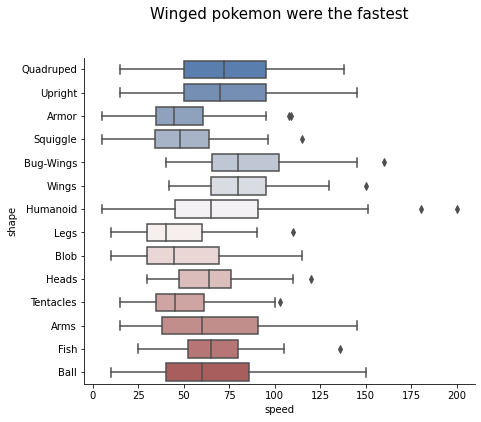

In [19]:
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="speed", y="shape", data=df_pokemon,
            width=0.75, palette="vlag")
# sns.stripplot(x="speed", y="shape", data=df_pokemon,
#               size=4, color=".3", linewidth=0)
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)
ax.set_title("Winged pokemon were the fastest", fontsize = 15, y = 1.1)


<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
-  Bug-Wings , Wings , legs,blob and armor have different average speeds than mean=67 with fastest being winged.

</div>


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


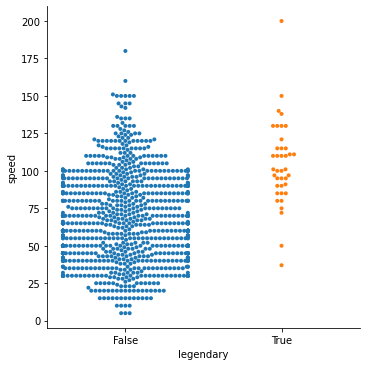

In [20]:

sns.catplot(data = df_pokemon, x = 'legendary', y = 'speed', kind = 'swarm',s=4)

<b> Hence, we are selecting two categorical variables as shape,legendary,can_evolve in regression model for simplicity.
These have highest difference in speeds as well. </b>

<div class="alert alert-block alert-success">   
<b><h4> Numerical Variables </h4></b>
</div>

In [21]:
df_numeric_pokemon=df_pokemon[df_pokemon.select_dtypes(include=["number"]).columns]

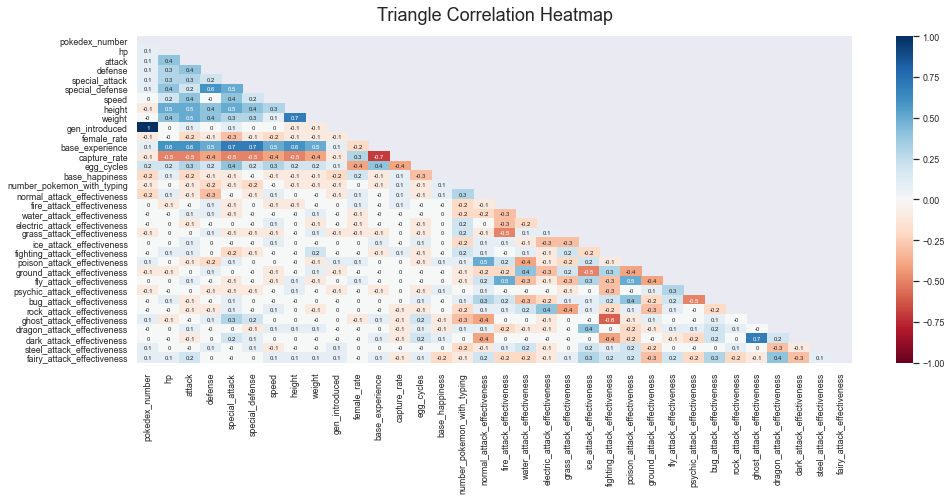

In [22]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
sns.set(font_scale=0.8) 
mask = np.triu(np.ones_like(df_numeric_pokemon.corr(), dtype=bool))
heatmap = sns.heatmap(df_numeric_pokemon.corr().round(1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu',annot_kws={"size":6})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);



<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- Speed has almost zero correlations with speed with all effectiveness variables . Hence, will discard in final model.
    Also, base_experience has high correlations with other variables. To remove multicollinearity, we will skip these variables too.

</div>

In [23]:
def show_corr(x, y, **kwargs):
    (r, _) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        'r = {:.2f}'.format(r),
        xy=(0.45, 0.85),
        xycoords=ax.transAxes
    )

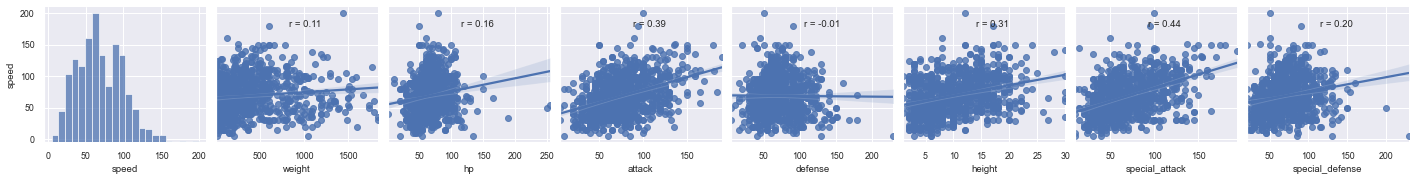

In [85]:

features = ["speed","weight", "hp", "attack", "defense", 
            "height", "special_attack", "special_defense"]  # Not including shape, can_evolve
sns.pairplot(x_vars = features, 
             y_vars = ["speed"], 
             data = df_pokemon, kind='reg').map_offdiag(show_corr)
# plt.savefig("lm_pairplot")

<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- There is definite relation of speed with special_attack,attack,special_defence, wieght and hp.We can see there is no relation of speed with egg_cycles and base_happiness.

</div>

## Regression Model

In [25]:
predictors = ["weight", "hp", "attack", "defense", "height","egg_cycles","female_rate","capture_rate","gen_introduced",
              "special_attack ", "special_defense", "C(shape)", "C(legendary)","C(can_evolve)"]
response = "speed ~ "
formula = response + " + ".join(predictors)

In [26]:
model = smf.ols(formula, data = df_pokemon).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     37.27
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          1.32e-125
Time:                        15:14:35   Log-Likelihood:                -4348.4
No. Observations:                 972   AIC:                             8751.
Df Residuals:                     945   BIC:                             8883.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                92.6658      7.476     12.395      0.000      77.994     107.338
C(shape)[T.Arms]         -1.8888      4.656     -0.406      0.685     -11.026       7.248
C(shape)[T.Ball]          5.0230      4.516      1.112      0.266      -3.839      13.885
C(shape)[T.Blob]         -5.0423      4.751     -1.061      0.289     -14.365       4.281
C(shape)[T.Bug-Wings]    14.3433      5.810      2.469      0.014       2.942      25.745
C(shape)[T.Fish]          7.6274      4.933      1.546      0.122      -2.054      17.308
C(shape)[T.Heads]         7.1683      6.445      1.112      0.266      -5.481      19.817
C(shape)[T.Humanoid]      2.6150      3.980      0.657      0.511      -5.196      10.426
C(shape)[T.Legs]          1.5365      5.826      0.264      0.792      -9.897      12.970
C(shape)[T.Quadruped]    14.6903      3.829      3.837      0.000       7.176      22.205
C(shape)[T.Squiggle]     -8.3426      5.270     -1.583      0.114     -18.685       2.000
C(shape)[T.Tentacles]    -8.9771      5.961     -1.506      0.132     -20.675       2.721
C(shape)[T.Upright]       8.6052      3.855      2.232      0.026       1.040      16.170
C(shape)[T.Wings]        15.3561      4.253      3.611      0.000       7.010      23.702
C(legendary)[T.True]      4.5522      4.647      0.980      0.327      -4.566      13.671
C(can_evolve)[T.True]   -23.6383      2.301    -10.271      0.000     -28.155     -19.122
weight                   -0.0106      0.003     -3.780      0.000      -0.016      -0.005
hp                       -0.3074      0.040     -7.730      0.000      -0.386      -0.229
attack                    0.2046      0.034      6.081      0.000       0.139       0.271
defense                  -0.3650      0.036    -10.200      0.000      -0.435      -0.295
height                    0.6934      0.212      3.278      0.001       0.278       1.108
egg_cycles                0.2138      0.041      5.181      0.000       0.133       0.295
female_rate              -2.0742      3.485     -0.595      0.552      -8.914       4.766
capture_rate             -0.0656      0.014     -4.650      0.000      -0.093      -0.038
gen_introduced           -0.4181      0.314     -1.330      0.184      -1.035       0.199
special_attack            0.1310      0.031      4.279      0.000       0.071       0.191
special_defense           0.0191      0.040      0.476      0.634      -0.060       0.098
==============================================================================
Omnibus:                        8.535   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.370
Skew:                           0.161   Prob(JB):                      0.00923
Kurtosis:                       3.357   Cond. No.                  

<div class="alert alert-block alert-success">   
<b><h4> ANOVA </h4></b>
</div>

In [28]:
sm.stats.anova_lm(model, typ=2) 
### can remove special_defense,female_rate,legendary as not much significance

,sum_sq,df,F,PR(>F)
C(shape),43303.483979,13.0,7.195421,1.588017e-13
C(legendary),444.334345,1.0,0.959813,3.274847e-01
C(can_evolve),48841.112242,1.0,105.502390,1.550913e-23
weight,6614.882291,1.0,14.288902,1.666169e-04
hp,27658.603049,1.0,59.745747,2.754205e-14
attack,17121.611049,1.0,36.984639,1.726612e-09
defense,48160.806477,1.0,104.032852,3.023661e-23
height,4974.559017,1.0,10.745617,1.083390e-03
egg_cycles,12428.321764,1.0,26.846597,2.692813e-07
female_rate,163.957278,1.0,0.354166,5.519065e-01


In [29]:
mse =pow(np.array(df_pokemon['speed'])-np.array(model.fittedvalues),2).mean()
rmse= math.sqrt(mse)
rmse

21.21506642520612

<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- We can remove special_defense,gen_introduced,female_rate and legendary as not much significance (high p-values). Next step is to improve model by removing these.

</div>

In [30]:
predictors = ["weight", "hp", "attack", "defense", "height","egg_cycles","capture_rate",
              "special_attack", "C(shape)", "C(can_evolve)"]
response = "speed ~ "
formula = response + " + ".join(predictors)
model = smf.ols(formula, data = df_pokemon).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     43.91
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          4.04e-128
Time:                        15:14:35   Log-Likelihood:                -4350.2
No. Observations:                 972   AIC:                             8746.
Df Residuals:                     949   BIC:                             8859.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                90.8575      6.767     13.427      0.000      77.578     104.137
C(shape)[T.Arms]         -1.1395      4.610     -0.247      0.805     -10.187       7.908
C(shape)[T.Ball]          5.1805      4.471      1.159      0.247      -3.594      13.955
C(shape)[T.Blob]         -5.4174      4.743     -1.142      0.254     -14.726       3.891
C(shape)[T.Bug-Wings]    14.4779      5.799      2.497      0.013       3.097      25.858
C(shape)[T.Fish]          7.5459      4.926      1.532      0.126      -2.120      17.212
C(shape)[T.Heads]         7.2970      6.429      1.135      0.257      -5.321      19.915
C(shape)[T.Humanoid]      2.6631      3.961      0.672      0.502      -5.111      10.437
C(shape)[T.Legs]          1.7210      5.820      0.296      0.768      -9.701      13.143
C(shape)[T.Quadruped]    14.8809      3.822      3.894      0.000       7.381      22.381
C(shape)[T.Squiggle]     -8.7316      5.258     -1.661      0.097     -19.050       1.587
C(shape)[T.Tentacles]    -9.4635      5.933     -1.595      0.111     -21.106       2.179
C(shape)[T.Upright]       8.8991      3.842      2.316      0.021       1.359      16.439
C(shape)[T.Wings]        15.8021      4.240      3.727      0.000       7.481      24.124
C(can_evolve)[T.True]   -23.7207      2.171    -10.924      0.000     -27.982     -19.459
weight                   -0.0102      0.003     -3.686      0.000      -0.016      -0.005
hp                       -0.3149      0.039     -8.080      0.000      -0.391      -0.238
attack                    0.1963      0.031      6.298      0.000       0.135       0.257
defense                  -0.3581      0.033    -10.977      0.000      -0.422      -0.294
height                    0.7416      0.208      3.563      0.000       0.333       1.150
egg_cycles                0.2401      0.033      7.315      0.000       0.176       0.305
capture_rate             -0.0680      0.014     -5.009      0.000      -0.095      -0.041
special_attack            0.1349      0.030      4.516      0.000       0.076       0.193
==============================================================================
Omnibus:                        8.788   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.907
Skew:                           0.155   Prob(JB):                      0.00706
Kurtosis:                       3.386   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
mse =pow(np.array(df_pokemon['speed'])-np.array(model.fittedvalues),2).mean()
rmse= math.sqrt(mse)
rmse

21.254066795042412

<div class="alert alert-block alert-success">   
<b><h4> Best Subsets Model Selection </h4></b>
</div>

In [32]:
features=["weight", "hp", "attack", "defense", "height","egg_cycles","capture_rate",
              "special_attack"]

In [33]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    feature_set=list(feature_set)
    [feature_set.append(x) for x in ["C(shape)","C(can_evolve)"]]
    predictors=feature_set
    response = "speed ~ "
    formula = response + " + ".join(predictors)
    model = smf.ols(formula, data = df_pokemon).fit()
    Adj_R2 =model.rsquared_adj
    return {"model":model, "Adj_R2":Adj_R2,"name": feature_set}

In [34]:
results =[]
for k in range(1,len(df_pokemon[features].columns)+1):
    for combo in combinations(df_pokemon[features].columns, k):
            results.append(processSubset(combo))

In [95]:
print(f"Total # of candidate models: {len(results)}")

Total # of candidate models: 255


In [35]:
[features.append(x) for x in ["shape","can_evolve"]]

[None, None]

In [36]:
y=df_pokemon['speed']
y_pred=results[-1]["model"].fittedvalues
cp_ls=[]
for i in range(len(results)):
    y_sub=results[i]["model"].fittedvalues
    cp_ls.append(mallow.mallow(y, y_pred, y_sub, len(df_pokemon[features].columns)+1,len(results[i]["name"])+1))



<div class="alert alert-block alert-success">   
<b><h5> Adjusted R-squared and Mallow's Cp </h5></b>
</div>

In [103]:
pd.set_option('display.max_colwidth', 500)
name=[','.join(results[i]["name"]) for i in range(len(results))]
adj_r2=[results[i]["Adj_R2"] for i in range(len(results))]
predictors=[len(i.split(","))+1+12 for i in name]

list_res=[(a,b,c,d) for a,b,c,d in zip(predictors,adj_r2,cp_ls,name)]


cp_df=pd.DataFrame(list_res,columns=['Predictors','Adjusted_R_Squared','Mallows CP','PredictorName'])
sorted_df = cp_df.sort_values(by=['Adjusted_R_Squared'], ascending=False)
sorted_df.head(3)

,Predictors,Adjusted_R_Squared,Mallows CP,PredictorName
254,23,0.492968,11.000000,"weight,hp,attack,defense,height,egg_cycles,capture_rate,special_attack,C(shape),C(can_evolve)"
249,22,0.486728,21.852570,"weight,hp,attack,defense,egg_cycles,capture_rate,special_attack,C(shape),C(can_evolve)"
253,22,0.486248,22.761918,"hp,attack,defense,height,egg_cycles,capture_rate,special_attack,C(shape),C(can_evolve)"


In [101]:
for i in sorted_df.loc[[253,254,249]]["PredictorName"]:
    predictors = i.split(",")
    print(f"speed ~ {' + '.join(predictors)}")

speed ~ hp + attack + defense + height + egg_cycles + capture_rate + special_attack + C(shape) + C(can_evolve)
speed ~ weight + hp + attack + defense + height + egg_cycles + capture_rate + special_attack + C(shape) + C(can_evolve)
speed ~ weight + hp + attack + defense + egg_cycles + capture_rate + special_attack + C(shape) + C(can_evolve)


<div class="alert alert-block alert-success">   
<b><h5> AIC/BIC </h5></b>
</div>

In [38]:
ls_aic_bic=[]
for i in range(len(results)):
    ls_aic_bic.append((results[i]["model"].aic,results[i]["model"].bic))
ls_aic_bic[-10:]

[(8830.60252937075, 8933.069001264419),
 (8765.015463173588, 8872.361290871717),
 (8769.71374072105, 8877.05956841918),
 (8797.660622852181, 8905.00645055031),
 (8757.259840863833, 8864.605668561962),
 (8860.524144568186, 8967.869972266315),
 (8784.151346167304, 8891.497173865433),
 (8809.0172168262, 8916.363044524329),
 (8758.167035493452, 8865.512863191581),
 (8746.346317533698, 8858.57150103629)]


<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- Same can be said from aic, bic. Can choose either models 253 or 249 with lowest aic,bic combination.
</div>


<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- best model candidates could be Index 253 and 249 as cp is close to predictors and Adjusted_R2 better than others.
</div>

In [39]:
sorted_df.loc[253]['PredictorName']

'hp,attack,defense,height,egg_cycles,capture_rate,special_attack,C(shape),C(can_evolve)'


<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- Height is removed from the model.
</div>

In [132]:
predictors = ["hp", "attack", "defense", "weight","egg_cycles","capture_rate",
              "special_attack", "C(shape)", "C(can_evolve)"]
response = "speed ~ "
formula = response + " + ".join(predictors)
model = smf.ols(formula, data = df_pokemon).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     44.85
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          2.85e-126
Time:                        00:31:15   Log-Likelihood:                -4356.6
No. Observations:                 972   AIC:                             8757.
Df Residuals:                     950   BIC:                             8865.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                92.2890      6.796     13.580      0.000      78.952     105.626
C(shape)[T.Arms]         -1.2643      4.638     -0.273      0.785     -10.367       7.839
C(shape)[T.Ball]          2.8493      4.450      0.640      0.522      -5.884      11.582
C(shape)[T.Blob]         -4.8978      4.770     -1.027      0.305     -14.259       4.463
C(shape)[T.Bug-Wings]    15.7021      5.824      2.696      0.007       4.272      27.132
C(shape)[T.Fish]          8.0777      4.953      1.631      0.103      -1.643      17.799
C(shape)[T.Heads]         7.9510      6.466      1.230      0.219      -4.739      20.641
C(shape)[T.Humanoid]      2.7242      3.986      0.684      0.494      -5.097      10.546
C(shape)[T.Legs]          1.6622      5.856      0.284      0.777      -9.830      13.155
C(shape)[T.Quadruped]    14.8112      3.845      3.852      0.000       7.265      22.357
C(shape)[T.Squiggle]     -7.3909      5.277     -1.401      0.162     -17.746       2.964
C(shape)[T.Tentacles]    -8.9020      5.967     -1.492      0.136     -20.612       2.808
C(shape)[T.Upright]       9.3254      3.864      2.414      0.016       1.743      16.908
C(shape)[T.Wings]        16.7946      4.257      3.945      0.000       8.440      25.149
C(can_evolve)[T.True]   -24.6836      2.168    -11.387      0.000     -28.938     -20.430
hp                       -0.2998      0.039     -7.691      0.000      -0.376      -0.223
attack                    0.2150      0.031      6.957      0.000       0.154       0.276
defense                  -0.3582      0.033    -10.911      0.000      -0.423      -0.294
weight                   -0.0047      0.002     -2.017      0.044      -0.009      -0.000
egg_cycles                0.2378      0.033      7.202      0.000       0.173       0.303
capture_rate             -0.0683      0.014     -5.003      0.000      -0.095      -0.042
special_attack            0.1590      0.029      5.433      0.000       0.102       0.216
==============================================================================
Omnibus:                        6.963   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.513
Skew:                           0.142   Prob(JB):                       0.0234
Kurtosis:                       3.325   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:

mse =pow(np.array(df_pokemon['speed'])-np.array(model.fittedvalues),2).mean()
rmse= math.sqrt(mse)
rmse

21.395722407866987


<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- Model adjusted_Rsquared and rmse remained similar but JB test for null hypothesis can't be rejected now. Next stei is to look for assumptions of selected best model so far.
</div>

## Model Diagnostics

### Multicollinearity

In [112]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices(formula,
                 data=df_pokemon, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor               features
0    95.852040              Intercept
1     2.301858       C(shape)[T.Arms]
2     2.527830       C(shape)[T.Ball]
3     2.040789       C(shape)[T.Blob]
4     1.626419  C(shape)[T.Bug-Wings]
5     1.961131       C(shape)[T.Fish]
6     1.404817      C(shape)[T.Heads]
7     4.231507   C(shape)[T.Humanoid]
8     1.504343       C(shape)[T.Legs]
9     4.728329  C(shape)[T.Quadruped]
10    1.728290   C(shape)[T.Squiggle]
11    1.489103  C(shape)[T.Tentacles]
12    5.174152    C(shape)[T.Upright]
13    2.969380      C(shape)[T.Wings]
14    2.404333  C(can_evolve)[T.True]
15    1.684345                     hp
16    1.776718                 attack
17    1.640335                defense
18    1.586271                 weight
19    1.294795             egg_cycles
20    2.238639           capture_rate
21    1.736624         special_attack


<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- No major multicollinearity among independent variables.

</div>

### Heteroscedasticity

#### Fitted values vs Residuals Plot

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

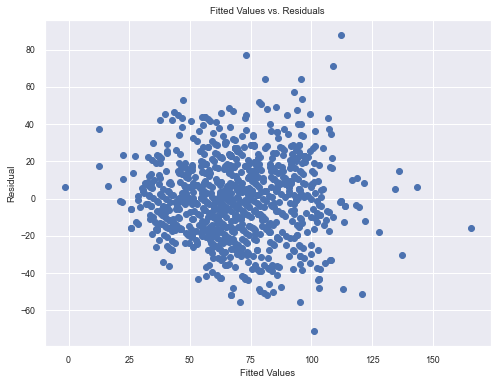

In [113]:
#Heteroscedasticity
#Fitted Values vs. Residuals Plot
plt.figure(figsize=(8, 6))
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
#looks bad
#the observations around y=0 is causing a lot of variaty in this data

In [114]:
## Observation(s) Causing Heterscedasticitiy
for i,r in enumerate(model.resid): 
    if abs(r) > 70: 
        print(i,r)

141 76.89014595259508
442 71.17410700279179
941 -71.29889792241681
968 87.88798534813591


#### Breusch-Pagan Test 

In [115]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))
# Heteroskedasticity exists


{'LM Statistic': 70.06324372735736, 'LM-Test p-value': 3.432916858709323e-07}




<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- We assume heteroscedasticity. May influenced by influential points.

</div>

### Normality

#### Histogram of Residuals

(array([  3.,  27.,  97., 224., 303., 205.,  77.,  30.,   4.,   2.]),
 array([-71.29889792, -55.3802096 , -39.46152127, -23.54283294,
         -7.62414461,   8.29454371,  24.21323204,  40.13192037,
         56.05060869,  71.96929702,  87.88798535]),
 <BarContainer object of 10 artists>)

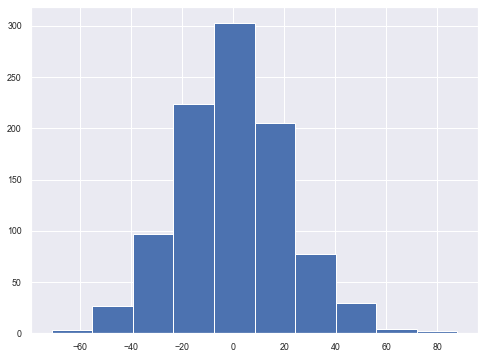

In [116]:
plt.figure(figsize=(8, 6))
plt.hist(res)

#### QQ-plot

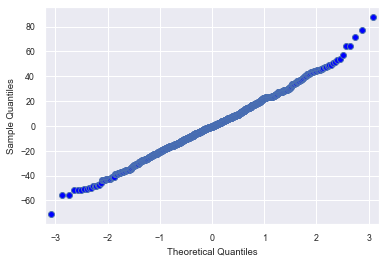

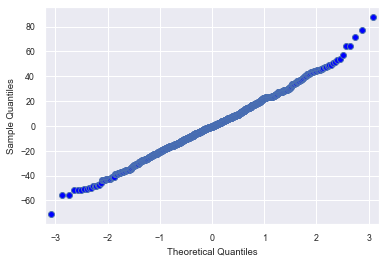

In [117]:
#QQ plot
sm.qqplot(model.resid)



<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- QQ-plot indicates some non-normality. Furthermore, the null hypothesis of the Jacque-Bera that the residuals are normal is rejected as seen in the model summary.

</div>

### Influential Points

In [118]:
# Inluential points
#object for the analysis of influential points
infl = model.get_influence()

#### Cook's Distance

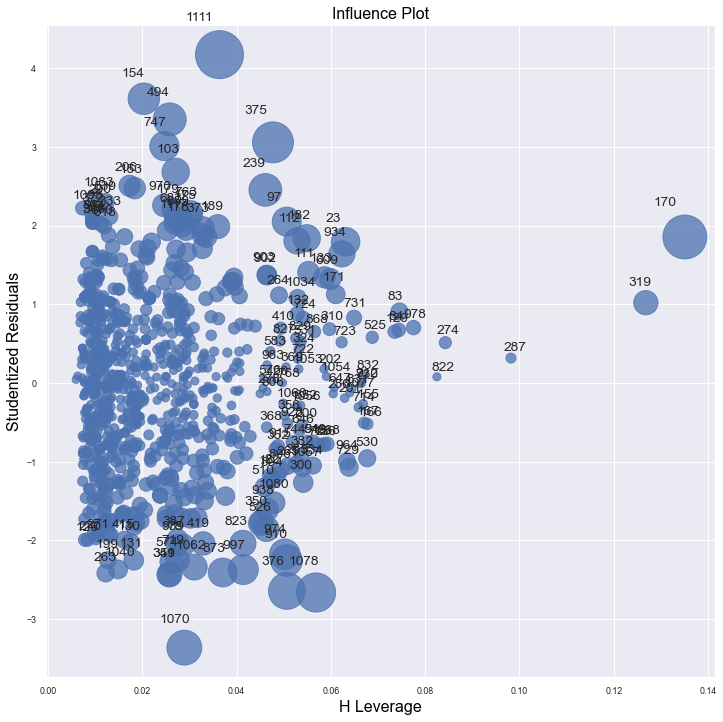

In [119]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 
#size of points are given by cook's dist value
#the points with big size and out of the (-3,3) should raise a flag

We find the index of all the influential points. We remove them and report new model.

In [120]:
n = len(df_pokemon)
#Cook's distance
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
infl_index = df_pokemon.index[atyp_cook]
print(infl_index) #,reg_cook[atyp_cook])

Int64Index([  23,   78,   81,   82,   97,  103,  111,  112,  131,  133,  153,
             154,  170,  175,  178,  179,  182,  189,  206,  239,  300,  319,
             349,  350,  351,  373,  375,  376,  387,  419,  494,  524,  526,
             558,  574,  609,  683,  719,  734,  747,  763,  811,  823,  859,
             873,  902,  903,  910,  934,  938,  939,  970,  974,  997, 1047,
            1062, 1070, 1078, 1080, 1097, 1111, 1117],
           dtype='int64')


In [121]:
len(df_pokemon)

972

In [122]:
df_less_pokemon = df_pokemon.loc[df_pokemon.index.difference(infl_index),:].copy()
print(f"Before: {n} | After: {len(df_less_pokemon)}")

Before: 972 | After: 910




<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- 65 Influential points are identified and removed.

</div>

## Regression Model w/o Influential Points

In [138]:
with_influential = model.params

In [139]:
model_new = smf.ols(formula, data = df_less_pokemon).fit()

In [140]:
without_influential = model_new.params

In [157]:
diff = pd.concat((with_influential.rename("With influential"),without_influential.rename("Without influential"),
          (abs(with_influential - without_influential)).rename("Difference"))
          , axis = 1).iloc[1:,:]

In [159]:
diff.sort_values(by = "Difference", ascending = False).head(3)

,With influential,Without influential,Difference
C(shape)[T.Bug-Wings],15.702089,6.298182,9.403906
C(shape)[T.Blob],-4.897789,-9.219037,4.321248
C(shape)[T.Legs],1.662223,-2.335118,3.997341


In [142]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     58.99
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          3.22e-152
Time:                        00:33:51   Log-Likelihood:                -3939.5
No. Observations:                 910   AIC:                             7923.
Df Residuals:                     888   BIC:                             8029.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                97.5595      6.222     15.680      0.000      85.348     109.771
C(shape)[T.Arms]         -2.6338      4.190     -0.629      0.530     -10.856       5.589
C(shape)[T.Ball]          2.0724      3.982      0.520      0.603      -5.743       9.888
C(shape)[T.Blob]         -9.2190      4.430     -2.081      0.038     -17.913      -0.525
C(shape)[T.Bug-Wings]     6.2982      6.122      1.029      0.304      -5.717      18.313
C(shape)[T.Fish]          8.1060      4.474      1.812      0.070      -0.675      16.887
C(shape)[T.Heads]         5.8816      5.620      1.047      0.296      -5.148      16.912
C(shape)[T.Humanoid]      0.1050      3.546      0.030      0.976      -6.855       7.065
C(shape)[T.Legs]         -2.3351      5.276     -0.443      0.658     -12.689       8.019
C(shape)[T.Quadruped]    14.3530      3.419      4.198      0.000       7.643      21.063
C(shape)[T.Squiggle]     -8.3902      4.695     -1.787      0.074     -17.604       0.824
C(shape)[T.Tentacles]   -10.7094      5.734     -1.868      0.062     -21.963       0.544
C(shape)[T.Upright]       8.6166      3.438      2.506      0.012       1.870      15.364
C(shape)[T.Wings]        15.7430      3.778      4.167      0.000       8.328      23.158
C(can_evolve)[T.True]   -26.1068      1.964    -13.296      0.000     -29.960     -22.253
hp                       -0.3613      0.040     -9.040      0.000      -0.440      -0.283
attack                    0.2266      0.028      7.981      0.000       0.171       0.282
defense                  -0.3431      0.030    -11.521      0.000      -0.402      -0.285
weight                   -0.0065      0.002     -3.141      0.002      -0.011      -0.002
egg_cycles                0.2258      0.031      7.355      0.000       0.166       0.286
capture_rate             -0.0766      0.012     -6.346      0.000      -0.100      -0.053
special_attack            0.1612      0.027      5.959      0.000       0.108       0.214
==============================================================================
Omnibus:                        2.639   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.300
Skew:                          -0.014   Prob(JB):                        0.317
Kurtosis:                       2.755   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
mse =pow(np.array(df_less_pokemon['speed'])-np.array(model_new.fittedvalues),2).mean()
rmse= math.sqrt(mse)
rmse

18.360438969093018



<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- Model Adjusted R squared has improved after removing influential points. Also, JB test is now not rejected for null hypothesis.
</div>

### Multicollinearity

In [144]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices(formula,
                 data=df_less_pokemon, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor               features
0   101.974403              Intercept
1     2.219050       C(shape)[T.Arms]
2     2.492506       C(shape)[T.Ball]
3     1.911436       C(shape)[T.Blob]
4     1.390198  C(shape)[T.Bug-Wings]
5     1.950067       C(shape)[T.Fish]
6     1.437101      C(shape)[T.Heads]
7     4.287418   C(shape)[T.Humanoid]
8     1.498742       C(shape)[T.Legs]
9     4.946968  C(shape)[T.Quadruped]
10    1.731429   C(shape)[T.Squiggle]
11    1.404073  C(shape)[T.Tentacles]
12    5.414409    C(shape)[T.Upright]
13    3.082504      C(shape)[T.Wings]
14    2.516273  C(can_evolve)[T.True]
15    1.881142                     hp
16    1.841564                 attack
17    1.701898                defense
18    1.588865                 weight
19    1.313486             egg_cycles
20    2.239152           capture_rate
21    1.813926         special_attack


No multicollinearity

### Heteroscedasticity

#### Fitted values vs Residuals Plot

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

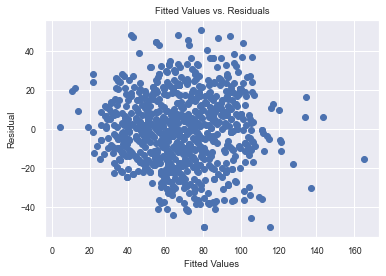

In [145]:
#Heteroscedasticity
#Fitted Values vs. Residuals Plot
p = model_new.fittedvalues
res = model_new.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
#looks bad
#the observations around y=0 is causing a lot of variaty in this data

#### Breusch-Pagan Test 

In [146]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_new.resid, model_new.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))
# Heteroskedasticity exists


{'LM Statistic': 56.02195314930411, 'LM-Test p-value': 5.0095437011124615e-05}




<div class="alert alert-block alert-warning"> 

<b>Inference</b>
    
- Heteroscedasticity still exits.
</div>

### Normality

#### Histogram of Residuals

(array([ 12.,  38.,  79., 139., 196., 192., 124.,  93.,  25.,  12.]),
 array([-50.44867942, -40.29720744, -30.14573547, -19.99426349,
         -9.84279151,   0.30868047,  10.46015245,  20.61162443,
         30.7630964 ,  40.91456838,  51.06604036]),
 <BarContainer object of 10 artists>)

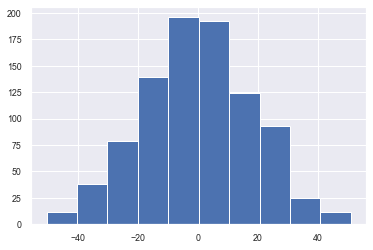

In [147]:
plt.hist(res)

#### QQ-plot

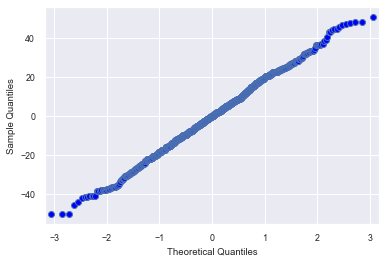

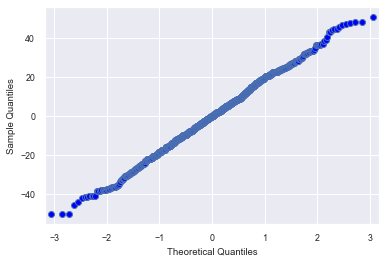

In [148]:
#QQ plot
sm.qqplot(model_new.resid)

QQ-plot indicates residuals are normal.

<div class="alert alert-block alert-warning"> 

<b>Conclusion</b>
    
- In our final model, we can still see heteroscedasticity. Also, we are not achieving very high goodness of fit which could be because of speed not being linearly related to most of the predictors. We might need to transform some of our features to make relations more linear. Also, the heteroscedasticity still persists in our final model. For which we can run corrected studentized t-test to see if actually some variables mayn’t alter inference and affect model results. 
    

- The best model for speed is its relationship with variables 
weight + hp + attack + defense + egg_cycles + capture_rate + special_attack + C(shape) + C(can_evolve)
where we can see the highest positive impacts of the shape of pokemon being quadrupled, fish or upright. We see speed is hindered if pokemon has tentacles or blobs. Also, evolution possibility(can_envolve) slows down pokemons

</div>